This notebook will run for both cpu and gpu

In [1]:
!git clone https://github.com/kk-digital/kcg-ml-elm
%cd kcg-ml-elm

Cloning into 'kcg-ml-elm'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 3), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (18/18), 139.03 KiB | 2.14 MiB/s, done.
/content/kcg-ml-elm


In [ ]:
!pip install -r /content/drive/MyDrive/requirements.txt


In [2]:
#!pip install -r /content/drive/MyDrive/requirements.txt
#!pip install str2bool
%%capture
%pip install ascii_graph open_clip_torch patool fire

In [6]:
from google.colab import drive
drive.mount._DEBUG = False
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Check Environment And Cuda Version 
from utility.CudaCheckGPU import GetCuda
from utility.EnvironmentChecker import GetEnvironment

GetCuda()
GetEnvironment()

CUDA version: 11.7
Environment is colab
CUDA version: 11.7


'colab'

Installation for clip modules

In [ ]:
import shutil 
src_folder='/content/drive/MyDrive/downloads/newdataset/others_dataset/others'
dst_folder='/content/drive/MyDrive/downloads/newdataset/pixel-art-tagged-v3/others'
shutil.copytree(src_folder, dst_folder)

'/content/drive/MyDrive/downloads/newdataset/pixel-art-tagged-v3/others'

If you want to extract dataset to some specific location otherwise do not run

In [ ]:
from zipfile import ZipFile
import os
# Specify location of downloaded data (zip file)
#downloaded_data_zip = '/content/drive/MyDrive/downloads/pixel-art-tagged-v3.zip'
downloaded_data_zip='/content/drive/MyDrive/downloads/pixel-art-pinterest-030.zip'
# Location to extract the zip file to
dataset_path = '/content/drive/MyDrive/downloads/newdataset'
with ZipFile(downloaded_data_zip) as zip_object:
    zip_object.extractall(dataset_path)

KeyboardInterrupt: ignored

Data split into train and test 

In [ ]:
import sys
import shutil 
sys.path.insert(0,'/content/kcg-ml-elm/notebooks/')
sys.path.insert(0, '/content/drive/MyDrive/')
from dataset_prepare import PrepareDataset
dataset_directory='/content/drive/MyDrive/downloads/newdataset/pixel-art-tagged-v3'
target_directory='/content/drive/MyDrive/downloads/split_dataset'

#dataset_prep = PrepareDataset(dataset_directory, train_ratio=0.8) #source directory
#dataset_prep.split_dataset(target_directory) # target destination

In [ ]:
!rm -r /content/kcg-ml-elm

Here you should import ELM classifier and ImageDatasetProcessor for feature extraction

In [1]:
import sys
sys.path.insert(0, '/content/kcg-ml-elm/notebooks/')
from Image_Dataset_Processor import ImageDatasetProcessor
import patoolib
from elm_model_upd import ELMClassifier
from elm_model_upd import TrainAndEvaluate
import elm_model_upd
import shutil

Specify the path for your data where clip features will be stored (json files) in output directory

In [1]:
# Specify the path to the dataset in dataset_path variable
dataset_path='/content/drive/MyDrive/downloads/newdataset/pixel-art-tagged-v3'
output_folder = '/content/drive/MyDrive/output'
clip_model = 'ViT-L-14'


Clip features will be computed if it is already extracted do not run

In [ ]:
import os
for file in os.listdir(target_directory):   #computing train and test features
    feature_path=os.path.join(output_folder,file)
    if not os.path.exists(feature_path):
        os.makedirs(feature_path,exist_ok=True)
    ImageDatasetProcessor.process_dataset(os.path.join(target_directory,file),feature_path, clip_model)
  #  ImageDatasetProcessor.process_dataset(feature_path, output_folder, clip_model)

[WARNING] problem with /content/drive/MyDrive/downloads/split_dataset/train/other-validation/https___i.pinimg.com_originals_00_92_c4_0092c473456acd2e4819da18ac964760.gif, cannot identify image file '/content/drive/MyDrive/downloads/split_dataset/train/other-validation/https___i.pinimg.com_originals_00_92_c4_0092c473456acd2e4819da18ac964760.gif'
[WARNING] file /content/drive/MyDrive/downloads/split_dataset/train/other-validation/https___i.pinimg.com_originals_00_92_c4_0092c473456acd2e4819da18ac964760.gif is not supported and will be ignored
Processing...


 16%|█▌        | 32/206 [04:31<29:30, 10.18s/it]

[INFO] dataset train finished processing 1000 images so far


 31%|███       | 63/206 [09:35<23:24,  9.82s/it]

[INFO] dataset train finished processing 2000 images so far


 46%|████▌     | 94/206 [14:17<17:30,  9.38s/it]

[INFO] dataset train finished processing 3000 images so far


 61%|██████    | 126/206 [18:45<12:13,  9.17s/it]

[INFO] dataset train finished processing 4000 images so far


 76%|███████▌  | 157/206 [23:34<07:37,  9.34s/it]

[INFO] dataset train finished processing 5000 images so far


 91%|█████████▏| 188/206 [28:18<02:42,  9.05s/it]

[INFO] dataset train finished processing 6000 images so far


100%|██████████| 206/206 [31:00<00:00,  9.03s/it]


[INFO] Writing to database table in /content/drive/MyDrive/output/train/image_dataset_cache.sqlite
[INFO] Finished.
Processing...


 63%|██████▎   | 32/51 [03:45<00:43,  2.31s/it]

[INFO] dataset test finished processing 1000 images so far


100%|██████████| 51/51 [04:28<00:00,  5.26s/it]


[INFO] Writing to database table in /content/drive/MyDrive/output/test/image_dataset_cache.sqlite
[INFO] Finished.


Running this cell will provide the paths to computed clip features and also setting percentage of data for validation in addition output directory for saving the results and checkpoints


In [2]:
metadata_json = '/content/drive/MyDrive/output/train/input-metadata.json' 
tag_to_hash_json = '/content/drive/MyDrive/output/train/input-tag-to-image-hash-list.json'
output_dir = '/content/drive/MyDrive/output'
n_samples_train=100
n_power=10 # e.g 2^n_power will train 8 classifiers of neurons=[2, 4, 8, 16, 32, 64, 128]
sparsity=0.000    #l1 regularization
num_iterations=100  #for optimizer to converge
checkpoint_path='/content/drive/MyDrive/elm_checkpoints'
evaluate_on_test=False

Running this cell will train and test simultaneously for different number of neurons


In [3]:
#Run the training and inference_script

my_trainer = TrainAndEvaluate(metadata_json, tag_to_hash_json, output_dir,checkpoint_path, 
                              n_samples_train, n_power, sparsity, num_iterations,evaluate_on_test)


my_trainer.train_test_classifier()


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

Total training time: 5.52 seconds


Testing on unseen data by loading checkpoints with different number of neurons with same tag 

Checkpoint loaded successfully...
model predictions started
<class 'dict'>
/content/drive/MyDrive/output/report/pos-pixel-art-environmental
Checkpoint loaded successfully...
model predictions started
<class 'dict'>
/content/drive/MyDrive/output/report/pos-pixel-art-environmental
Checkpoint loaded successfully...
model predictions started
<class 'dict'>
/content/drive/MyDrive/output/report/pos-pixel-art-environmental
Checkpoint loaded successfully...
model predictions started
<class 'dict'>
/content/drive/MyDrive/output/report/pos-pixel-art-environmental
Checkpoint loaded successfully...
model predictions started
<class 'dict'>
/content/drive/MyDrive/output/report/pos-pixel-art-environmental
Checkpoint loaded successfully...
model predictions started
<class 'dict'>
/content/drive/MyDrive/output/report/pos-pixel-art-environmental
Checkpoint loaded successfully...
model predictions started
<class 'dict'>
/content/drive/MyDrive/output/report/pos-pixel-art-environmental
Checkpoint loaded su

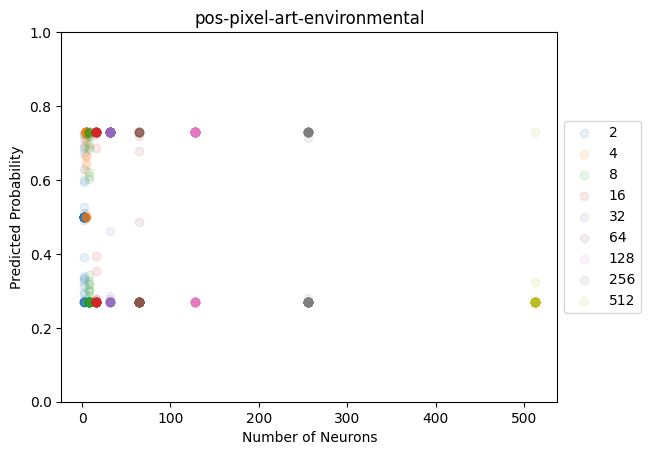

<Figure size 640x480 with 0 Axes>

In [2]:
import sys
import os
import glob
sys.path.insert(0,'/content/kcg-ml-elm/notebooks/')
from elm_only_evaluation import evaluation,select_device
compute_features=False  # make it false if not already computed
test_directory='/content/drive/MyDrive/downloads/split_dataset/test'        
metadata_json = '/content/drive/MyDrive/output/test/input-metadata.json' 
tag_to_hash_json = '/content/drive/MyDrive/output/test/input-tag-to-image-hash-list.json'
output_dir = '/content/drive/MyDrive/output'
checkpoints_path='/content/drive/MyDrive/elm_checkpoints' #load your tag models with different neurons
tag_to_test='pos-pixel-art-environmental' # name of category you want to test
checkpoints_tag=os.path.join(checkpoints_path,tag_to_test) 
extension = "*.pth"
checkpoints = glob.glob(checkpoints_tag + "/" + extension)
device=select_device()    #pick either gpu or cpu
tag_predictions_list=[]
neurons_list=[]

for checkpoint_path in checkpoints:   #iterate through each checkpoint and make predictions on same data
 
    tag_prob,n_neurons,evaluate,folder_plots= evaluation(compute_features,test_directory,metadata_json,tag_to_hash_json,
           output_dir,clip_model,tag_to_test,checkpoint_path,device)
    
    tag_predictions_list.append(tag_prob)
    neurons_list.append(n_neurons)    

evaluate.scatter_plot(neurons_list,tag_predictions_list,tag_to_test,folder_plots)  #to check probabilites for different neurons predictions


warning running on cpu, no cuda device is found
(500, 280)


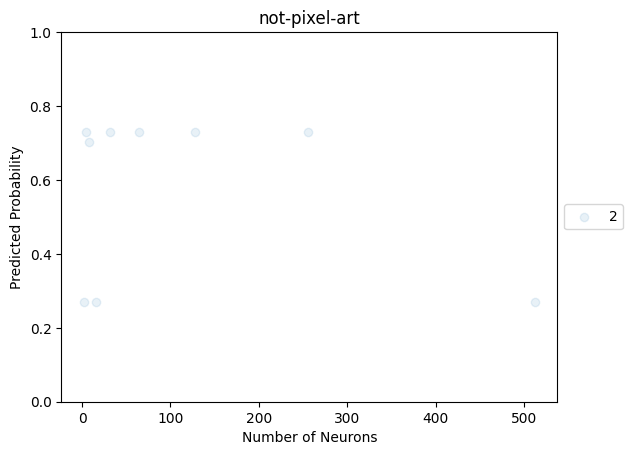

In [3]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import sys
import torch
import os
sys.path.insert(0,'/content/kcg-ml-elm/notebooks/')
from elm_model_upd import process_single_image 
from elm_model_upd import ELMClassifier

# Load input image
input_image_path ='/content/drive/MyDrive/downloads/split_dataset/test/not-pixel-art/https___i.pinimg.com_originals_f1_23_f9_f123f9341a5ce902a1f464e980a6ceed.png'
# Load checkpoints
tag='not-pixel-art'
checkpoints_path='/content/drive/MyDrive/elm_checkpoints'
checkpoints_tag=os.path.join(checkpoints_path,tag)
extension = "*.pth"
checkpoints = glob.glob(checkpoints_tag + "/" + extension)
# Initialize lists to store the number of neurons and the predicted probabilities
neurons_list = []
predictions_list = []
colors_list = []
clip_model= 'ViT-L-14' 
i=0
# Load image and obtain embeddings
test_sample=process_single_image(input_image_path,clip_model)
# Loop through each checkpoint


# Initialize lists to store the number of neurons and the predicted probabilities
neurons_list = []
class0_predictions_list = []
class1_predictions_list = []

# Loop through each checkpoint
for checkpoint_path in checkpoints:
    # Load model
    checkpoint = torch.load(checkpoint_path)
    model = ELMClassifier(input_size=checkpoint['input_size'], hidden_size=checkpoint['hidden_size'], 
                        output_size=checkpoint['output_size'])
    
    # Extract number of neurons from model name or saved configuration
    neurons=checkpoint['hidden_size']    
    neurons_list.append(neurons)
    
    # Make predictions on input data
    y_pred = model.forward(test_sample)
    
    # Extract probability of positive class (class 0) and negative class (class 1)
    class0_prob, class1_prob = torch.softmax(y_pred, dim=1).detach().cpu().numpy().squeeze()
   # class0_prob = class0_prob + np.random.normal(loc=0, scale=0.05, size=1)
    class0_predictions_list.append(class0_prob)
   # class1_predictions_list.append(class1_prob)

# Create scatter plot
plt.scatter(neurons_list, class0_predictions_list, label='Tag:'+tag,alpha=0.1)
#plt.scatter(neurons_list, class1_predictions_list, label='Class 1')
plt.xlabel('Number of Neurons')
plt.ylabel('Predicted Probability')
plt.title(tag)
# Set y-axis limits
plt.ylim(0, 1)
plt.legend(list(map(str, neurons_list)),  ncol = 1,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



if you want to test only then this script will load checkpoint and perform inference please check this file before running to set different arguments such as filepath and checkpoints etc

In [ ]:
!python /content/drive/MyDrive/only_inference.py

[WARNING] problem with /content/drive/MyDrive/downloads/newdataset/split/val/other-validation/https___i.pinimg.com_originals_00_92_c4_0092c473456acd2e4819da18ac964760.gif, cannot identify image file '/content/drive/MyDrive/downloads/newdataset/split/val/other-validation/https___i.pinimg.com_originals_00_92_c4_0092c473456acd2e4819da18ac964760.gif'
[WARNING] file /content/drive/MyDrive/downloads/newdataset/split/val/other-validation/https___i.pinimg.com_originals_00_92_c4_0092c473456acd2e4819da18ac964760.gif is not supported and will be ignored
[WARNING]: Input dataset contains empty folder: /content/drive/MyDrive/downloads/newdataset/split/val/pos-environmental-natural]
[WARNING]: Input dataset contains empty folder: /content/drive/MyDrive/downloads/newdataset/split/val/pos-pixel-art-environmental]
[WARNING]: Input dataset contains empty folder: /content/drive/MyDrive/downloads/newdataset/split/val/pos-pixel-art-machine]
[WARNING]: Input dataset contains empty folder: /content/drive/MyD